<a href="https://colab.research.google.com/github/iamafifaah/Google-Colab/blob/main/Rasterio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install rasterio

In [ ]:
pip install pyspatialml

In [ ]:
##from pyspatialml import Raster
import os
import matplotlib.pyplot as plt
##import geopandas
##import pandas as pd
##import seaborn as sn
import rasterio.plot
import numpy as np
import matplotlib as mpl
import os
##import geopandas as gpd
import numpy as np
from tempfile import NamedTemporaryFile
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pwd

/content


In [ ]:
# channel = r'/content/raster/LULC.tif'
# channel = r'/content/raster/MNDWI.tif'
# channel = r'/content/raster/NDBI.tif'
# channel = r'/content/raster/NDWI.tif'
# channel = r'/content/raster/nightlight.tif'

In [ ]:
lulc = rasterio.open('/content/raster/LULC.tif')
mndwi = rasterio.open('/content/raster/MNDWI.tif')
ndbi = rasterio.open('/content/raster/NDBI.tif')
ndwi = rasterio.open('/content/raster/NDWI.tif')
nightlight = rasterio.open('/content/raster/nightlight.tif')
rainfall = rasterio.open('/content/raster/rainfall.tif')

In [ ]:
dissriver = rasterio.open('/content/raster/distance to river.tif')
slope = rasterio.open('/content/raster/slope.tif')
topografi = rasterio.open('/content/raster/topografi.tif')
popdensity = rasterio.open('/content/raster/population density.tif')
sexratio = rasterio.open('/content/raster/sexratio.tif')
twi = rasterio.open('/content/raster/twi.tif')

In [ ]:
lulc.shape

(1042, 1058)

In [ ]:
mndwi.shape

(1042, 1058)

In [ ]:
ndbi.shape

(1042, 1058)

In [ ]:
ndwi.shape

(1042, 1058)

In [ ]:
nightlight.shape

(1042, 1058)

In [ ]:
rainfall.shape

(1041, 1058)

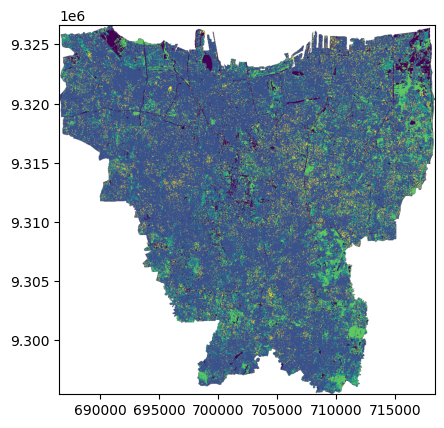

<Axes: >

In [ ]:
from rasterio.plot import show
show(lulc)

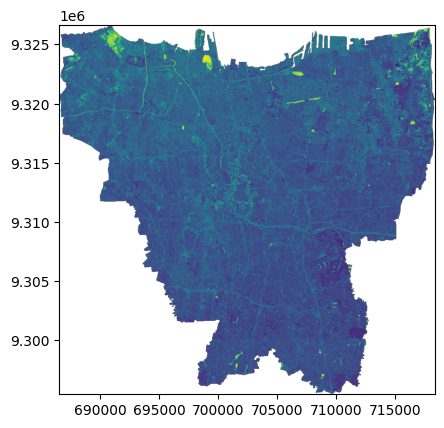

<Axes: >

In [ ]:
from rasterio.plot import show
show(mndwi)

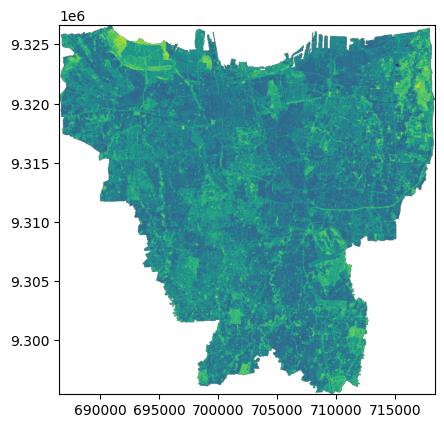

<Axes: >

In [ ]:
show(ndwi)

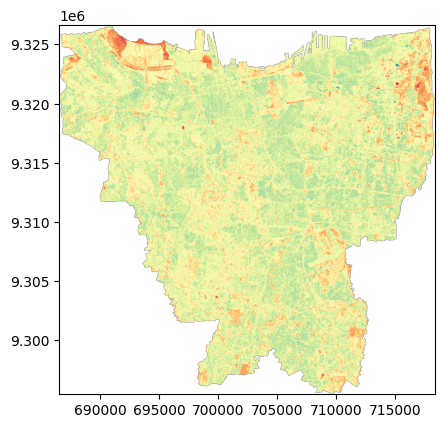

<Axes: >

In [ ]:
show(ndbi, cmap= "Spectral" )

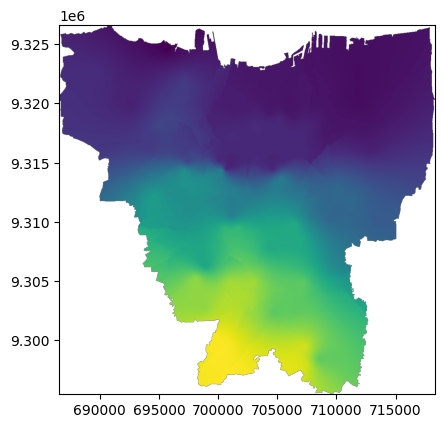

<Axes: >

In [ ]:
show(rainfall)

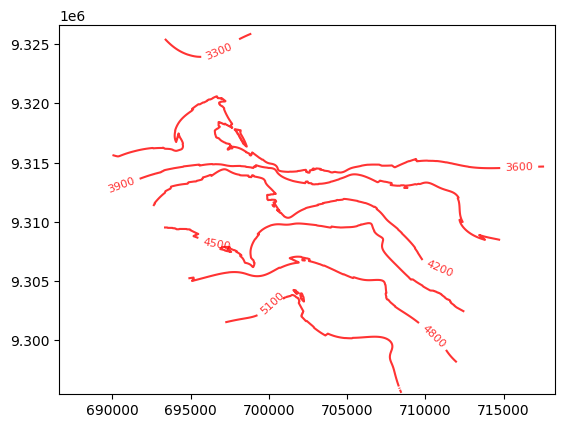

<Axes: >

In [ ]:
show(rainfall, contour=True)

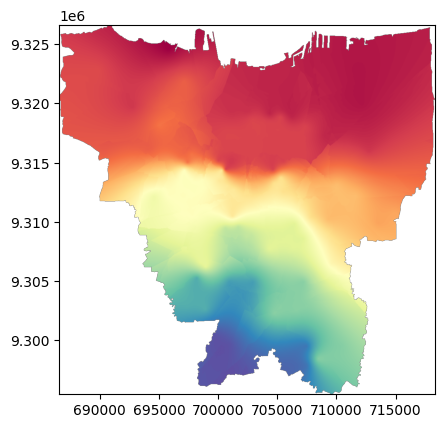

<Axes: >

In [ ]:
show(rainfall, cmap= "Spectral" )

In [ ]:
predictors = ['LULC.tif','rainfall.tif','MNDWI.tif','NDBI.tif','NDWI.tif','nightlight.tif']

In [ ]:
print(predictors)

['LULC.tif', 'rainfall.tif', 'MNDWI.tif', 'NDBI.tif', 'NDWI.tif', 'nightlight.tif']


In [ ]:
for predictor_path in predictors:
    try:
        with rasterio.open(f'/content/raster/{predictor_path}') as src:
            print(f"File: {predictor_path}")
            print(f"  Shape: {src.shape}")
            print(f"  Bounds (coordinates): {src.bounds}")
            print("-" * 20)
    except rasterio.errors.RasterioIOError as e:
        print(f"Error opening file {predictor_path}: {e}")

File: LULC.tif
  Shape: (1042, 1058)
  Bounds (coordinates): BoundingBox(left=686571.647782931, bottom=9295415.820755921, right=718311.647782931, top=9326675.820755921)
--------------------
File: rainfall.tif
  Shape: (1041, 1058)
  Bounds (coordinates): BoundingBox(left=686589.2461000001, bottom=9295423.5361, right=718329.2461000001, top=9326653.5361)
--------------------
File: MNDWI.tif
  Shape: (1042, 1058)
  Bounds (coordinates): BoundingBox(left=686571.647782931, bottom=9295415.820755921, right=718311.647782931, top=9326675.820755921)
--------------------
File: NDBI.tif
  Shape: (1042, 1058)
  Bounds (coordinates): BoundingBox(left=686571.647782931, bottom=9295415.820755921, right=718311.647782931, top=9326675.820755921)
--------------------
File: NDWI.tif
  Shape: (1042, 1058)
  Bounds (coordinates): BoundingBox(left=686571.647782931, bottom=9295415.820755921, right=718311.647782931, top=9326675.820755921)
--------------------
File: nightlight.tif
  Shape: (1042, 1058)
  Bounds (

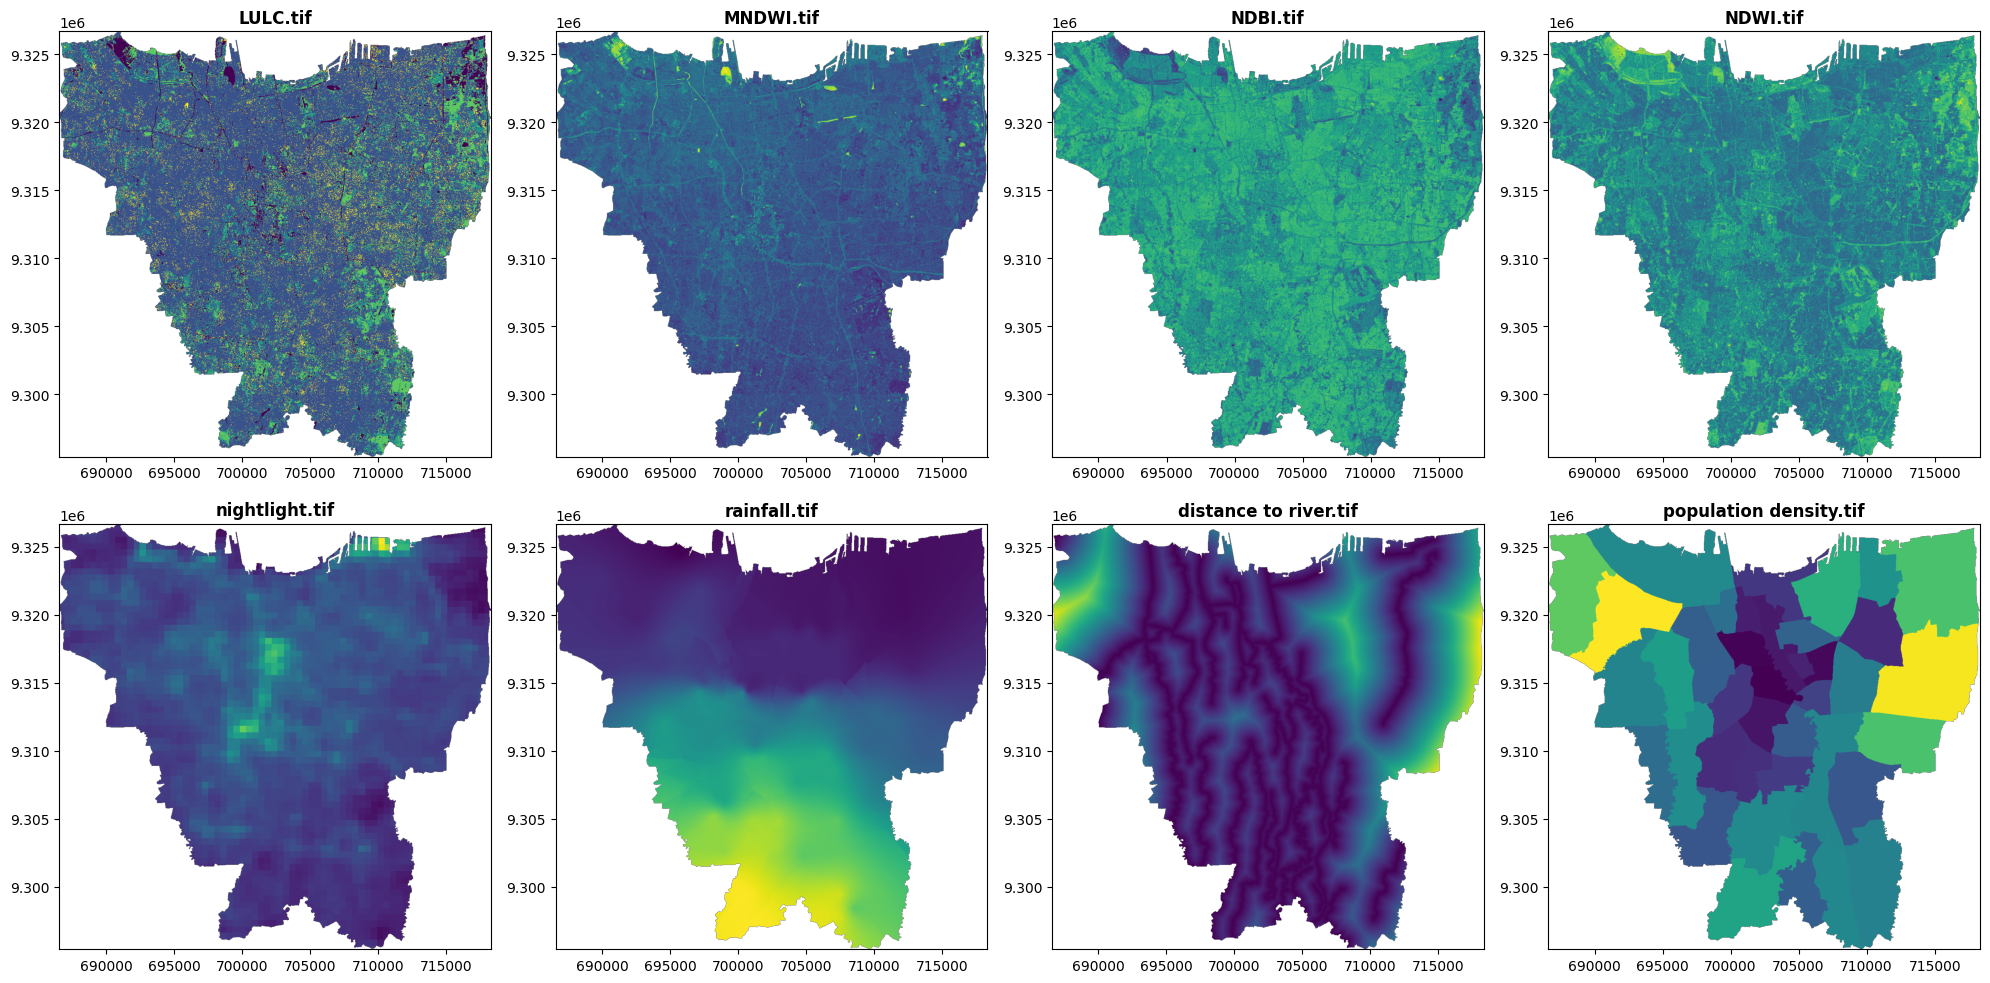

In [ ]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt

# List of raster file paths
raster_paths = ['/content/raster/LULC.tif', '/content/raster/MNDWI.tif', '/content/raster/NDBI.tif', '/content/raster/NDWI.tif', '/content/raster/nightlight.tif', '/content/raster/rainfall.tif',
                '/content/raster/distance to river.tif', '/content/raster/population density.tif']

#fig, axes = plt.subplots(1, len(raster_paths), figsize=(15, 5)) # Create subplots

for i, path in enumerate(raster_paths):
    with rasterio.open(path) as src:
        filename = os.path.basename(path)
        show(src, ax=axes[i], title=filename)


# Tentukan jumlah baris dan kolom
rows = 2
cols = 4

fig, axes = plt.subplots(rows, cols, figsize=(20, 10))  # Sesuaikan ukuran figure

# Flatten axes agar bisa diakses satu per satu dengan index tunggal
axes = axes.flatten()

for i, path in enumerate(raster_paths):
    with rasterio.open(path) as src:
        filename = os.path.basename(path)
        show(src, ax=axes[i], title=filename)

# Matikan subplot kosong jika ada
for j in range(len(raster_paths), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

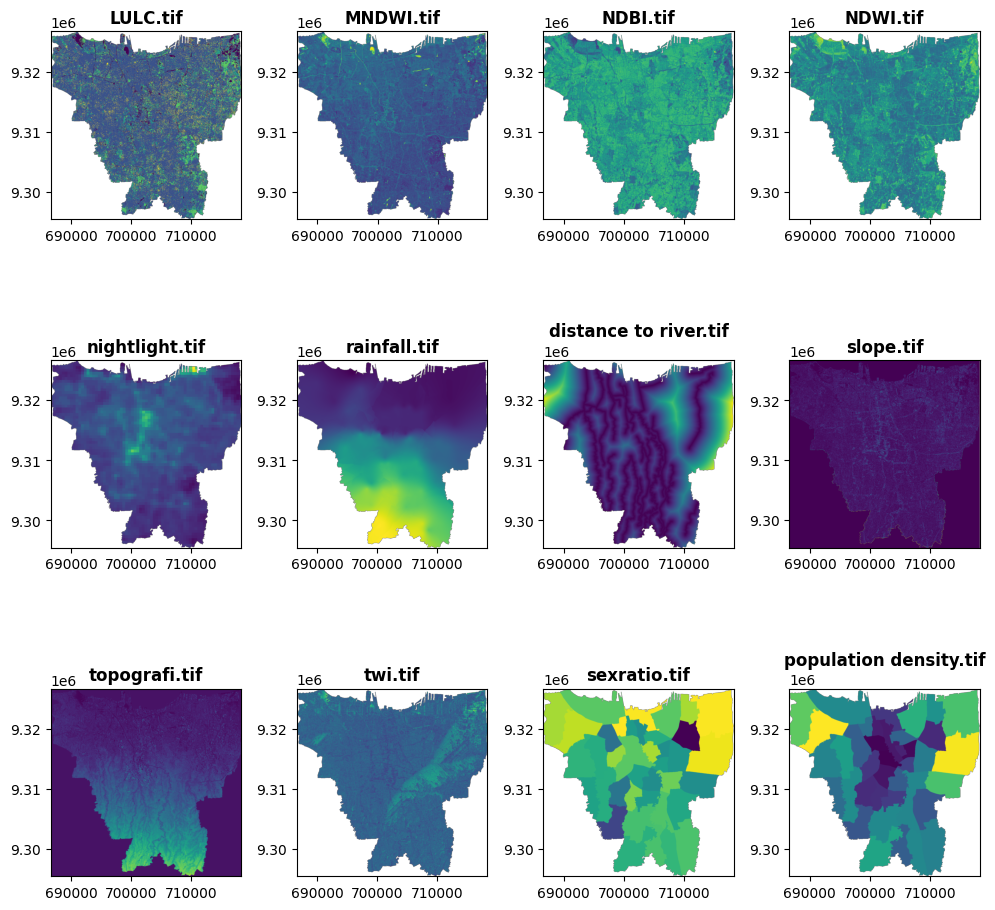

In [ ]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt

# List of raster file paths
raster_paths = ['/content/raster/LULC.tif', '/content/raster/MNDWI.tif', '/content/raster/NDBI.tif', '/content/raster/NDWI.tif', '/content/raster/nightlight.tif', '/content/raster/rainfall.tif',
                '/content/raster/distance to river.tif', '/content/raster/slope.tif','/content/raster/topografi.tif','/content/raster/twi.tif','/content/raster/sexratio.tif','/content/raster/population density.tif']

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 10))

# Flatten axes agar bisa diakses satu per satu dengan index tunggal
axes = axes.flatten()

for i, path in enumerate(raster_paths):
    with rasterio.open(path) as src:
        filename = os.path.basename(path)
        show(src, ax=axes[i], title=filename)

# Turn off empty subplots if any
for j in range(len(raster_paths), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
print(raster_paths)

['/content/raster/LULC.tif', '/content/raster/MNDWI.tif', '/content/raster/NDBI.tif', '/content/raster/NDWI.tif', '/content/raster/nightlight.tif', '/content/raster/rainfall.tif']


In [ ]:
print(predictors)

['LULC.tif', 'rainfall.tif', 'MNDWI.tif', 'NDBI.tif', 'NDWI.tif', 'nightlight.tif']
